Name: Aparna Iyer

PRN: 22070126017

Division: AI-ML A1

Batch: 2022-2026

#**1. Dataset Description**

Name of the Dataset: **Mall Customers Dataset**

Source: Kaggle

Attributes: 5

a. CustomerID: Every customer is assigned a CustomerID which serves as the primary key or the identification/indexing column in this dataset.

b. Gender: The gender of the customer- either Male (denoted by M) or Female  (denoted by F).

c. Age: The age of the customer serves as another attribute on which customers and their spending styles can be segmented.

d. Annual Income (k$): Annual Income of customers often decides their spending style and preferences. It becomes a crucial attribute that is often used in customer segmentation and analysis.

e. Spending Score (1-100): The Spending Score is typically calculated based on the spending behavior of customers in a mall. It is a metric used to assess how much a customer spends relative to other customers.

Number of records (rows)= 200

Datatypes of Attributes:

a. CustomerID: Integer

b. Gender: Object

c. Age: Integer

d. Annual Income (k$): Integer

e. Spending Score (1-100): Integer


#**2. Data-Preprocessing**

In [ ]:
#Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Load the Dataset File (csv or Excel) into a Pandas DataFrame.
df_customers=pd.read_csv("/content/Mall_Customers.csv")

Exploring the dataset- the shape, number of dimensions, statistical properties, presence of null values.

In [ ]:
#To display the first 5 records of the DataFrame to understand its overall structure and the nature of its attributes.
df_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#To display the last 5 records of the DataFrame
df_customers.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
#To display the number of rows and columns in the DataFrame (i.e., the shape of the DataFrame)
df_customers.shape #Output is a tuple of the form (rows,columns)

(200, 5)

There are 200 rows and 5 columns in the DataFrame.

In [ ]:
#To display the Descriptive Statistics on the DataFrame: count of records, mean, std deviation, min, max values
df_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#To check the data-types of each column of the DataFrame
print("Data Types:\n")
print(df_customers.dtypes) #Returns the data-type of each attribute as well as the data-type of the overall DataFrame

Data Types:

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
#To identify missing(NaN) or null values
print("\nMissing or Null Values: \n")
print(df_customers.isnull().sum())


Missing or Null Values: 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


There are no Missing/Null values in any of the columns.

In [ ]:
#To handle missing or Null values, we can impute them with the mean/median/mode of the column.
#Since there are no missing values in our DataFrame, this step can be skipped.

#To handle missing or NaN values, we can Impute them using Mean, Median or Mode.

df_customers['CustomerID'].fillna(df_customers['CustomerID'].mean(), inplace=True)
df_customers["Gender"].fillna(df_customers["Gender"].mode()[0],inplace=True)
# Impute missing values with mean
df_customers['Age'].fillna(df_customers['Age'].mean(), inplace=True)

# Impute missing values with median
df_customers['Annual Income (k$)'].fillna(df_customers['Annual Income (k$)'].median(), inplace=True)

# Impute missing values with mode
df_customers['Spending Score (1-100)'].fillna(df_customers['Spending Score (1-100)'].mode()[0], inplace=True)

In [ ]:
#To check if there are still missing(NaN) or null values
print("\nMissing or Null Values: \n")
print(df_customers.isnull().sum())


Missing or Null Values: 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Check the frequency distribution of each category in categorical columns (i.e., Gender in our case)
categorical_columns = df_customers.select_dtypes(include=['object']).columns  # Select categorical columns
for column in categorical_columns:
    print(f"Frequency distribution of values in column '{column}':")
    print(df_customers[column].value_counts())
    print()

Frequency distribution of values in column 'Gender':
Gender
Female    112
Male       88
Name: count, dtype: int64



In [ ]:
# Removing duplicate rows from the DataFrame

df_customers.drop_duplicates(inplace=True)

print(df_customers)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


We see that the shape and records in the DataFrame remain intact. This is because there were no duplicate records in the DataFrame.

In [ ]:
#To check the data-types of each column of the DataFrame
print("Data Types:\n")
print(df_customers.dtypes) #Returns the data-type of each attribute as well as the data-type of the overall DataFrame

Data Types:

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
#Data-Type Conversion
#We need to convert all the attributes to uniform data-types that suits the data and our analysis

#Convert the Data-Type of the Gender column from object to categorical
df_customers['Gender'] = df_customers['Gender'].astype('category')


In [ ]:
#To check the new data-types of each column of the DataFrame
print("Data Types:\n")
print(df_customers.dtypes) #Returns the data-type of each attribute as well as the data-type of the overall DataFrame

Data Types:

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object


#**3. Exploratory Data Analysis (EDA)**

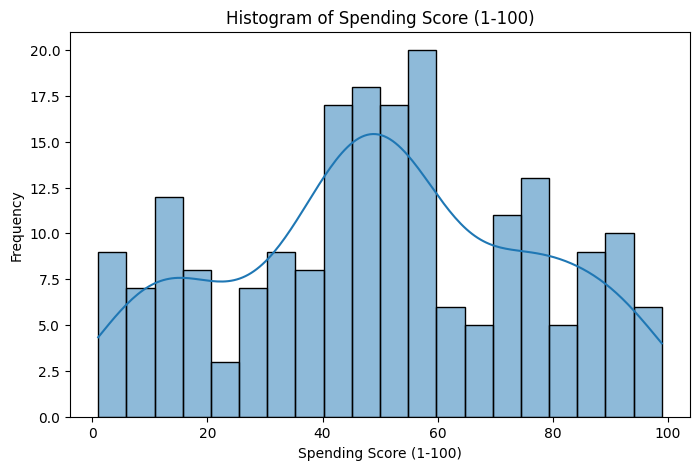

<Figure size 800x500 with 0 Axes>

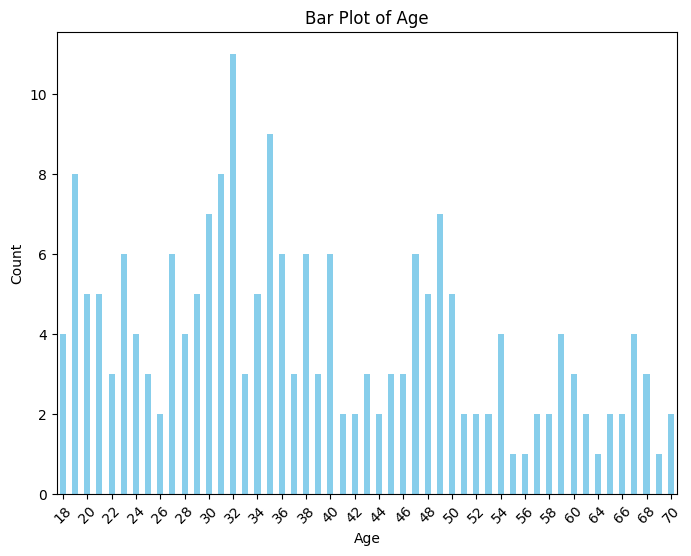

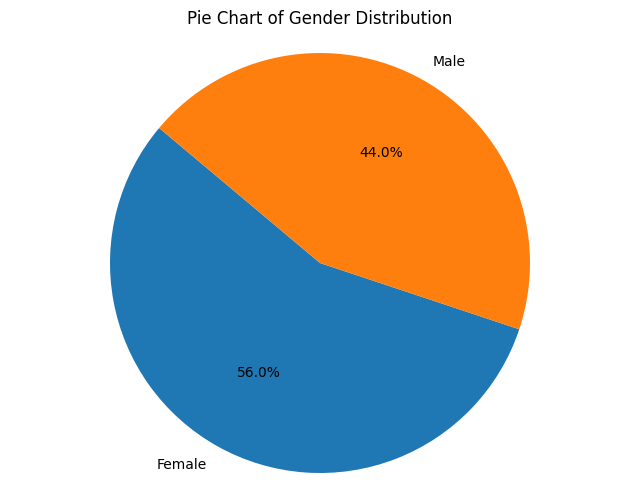

In [ ]:
#Various types of representations of the data through plots (Histogram, Bar Plot, Pie Chart)

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_customers['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Histogram of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

# Bar plot
plt.figure(figsize=(8, 5))
# Calculate value counts for each category
category_counts = df_customers['Age'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')

# Set custom labels on the x-axis
plt.xticks(range(0, len(category_counts), 2), category_counts.index[::2], rotation=45)

#sns.countplot(x='Age', data=df_customers)
plt.title('Bar Plot of Age')
#plt.xticks(range(len(category_counts)), category_counts.index)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Pie Chart
# Calculate value counts for each category
category_counts = df_customers['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

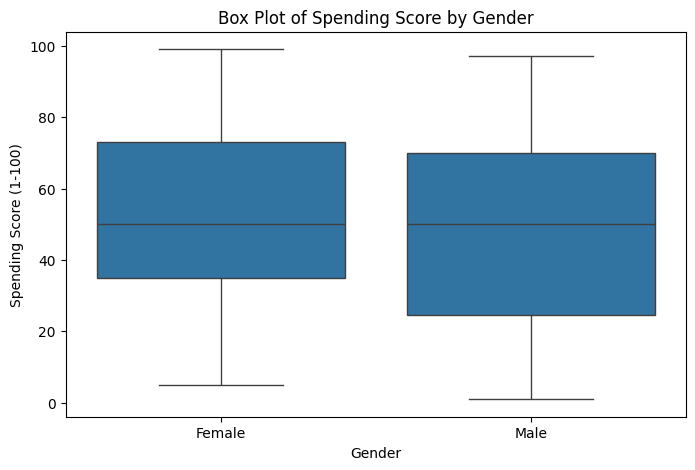

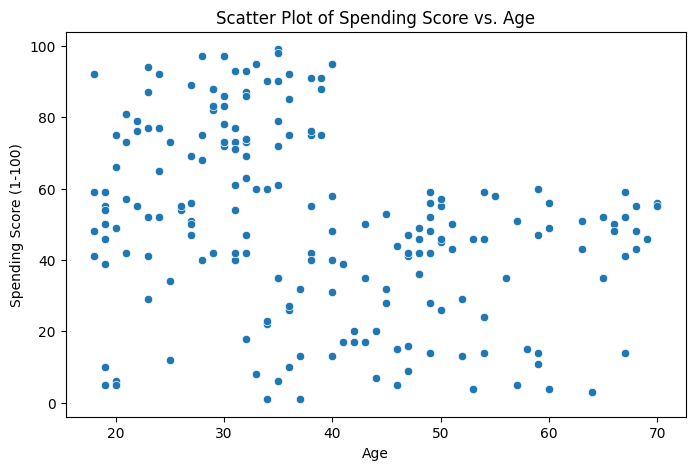

In [ ]:
#Univariate Analysis using Box Plot
# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df_customers)
plt.title('Box Plot of Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Bivariate Analysis using Scatter Plot
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_customers)
plt.title('Scatter Plot of Spending Score vs. Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

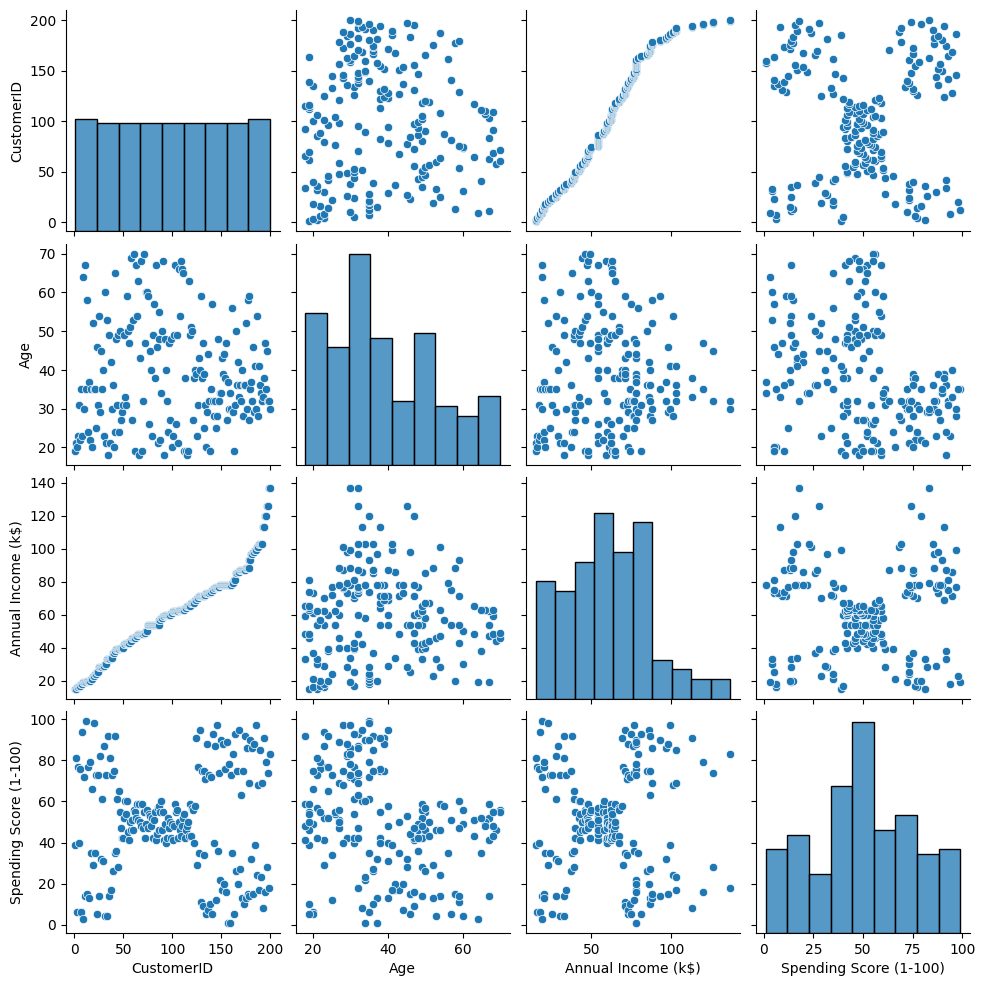

In [ ]:
#Multivariate Analysis using Pairplots
# Pair plot
sns.pairplot(df_customers)
plt.show()

In [ ]:
#Label Encoding Categorical Values into Numerical Values in the Gender Column

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_customers['Gender'] = label_encoder.fit_transform(df_customers['Gender'])
#1 for Male, 0 for Female
print(df_customers)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


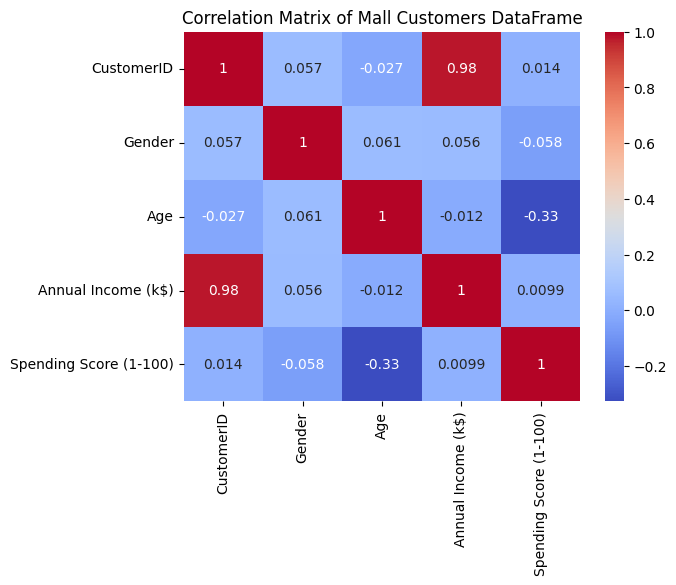

In [ ]:
#Multivariate Analysis using Correlation Matrix and Seaborn Heatmap
# Calculate correlation matrix
correlation_matrix = df_customers.corr()

# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Mall Customers DataFrame')
plt.show()

In [ ]:
#Data Scaling: Scaling is important when features have different scales, as it ensures that all features contribute equally to the model.

#Min-Max Scaling: Scales the data to a fixed range, typically between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
data_scaled_min_max = scaler.fit_transform(df_customers)
df_customers_scaled1 = pd.DataFrame(data_scaled_min_max, columns=df_customers.columns)

df_customers_scaled1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


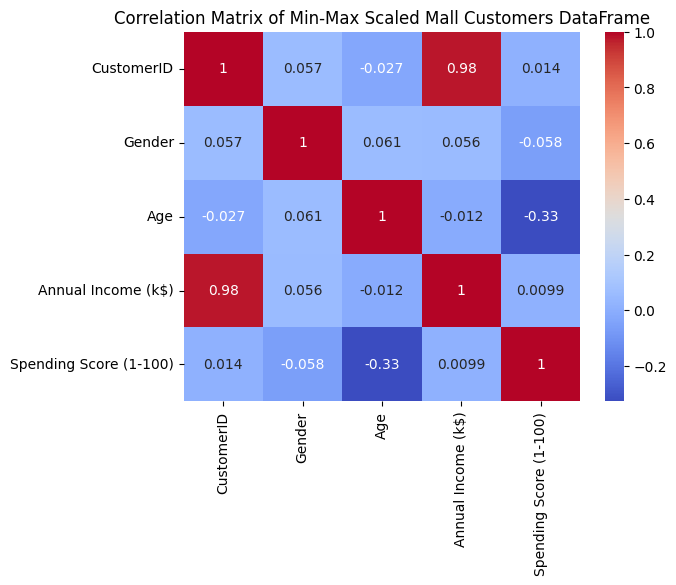

The Correlation Matrix is unaffected by scaling the DataFrame. This is because scaling preserves the linear relationships between the variables.


In [ ]:
#Multivariate Analysis using Correlation Matrix and Seaborn Heatmap
# Calculate correlation matrix
correlation_matrix = df_customers_scaled1.corr()

# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Min-Max Scaled Mall Customers DataFrame')
plt.show()

print("The Correlation Matrix is unaffected by scaling the DataFrame. This is because scaling preserves the linear relationships between the variables.")

In [ ]:
# Standard Scaling (Z-score normalization): Scales the data to have a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler

# Standard Scaling
scaler = StandardScaler()  #Creating a StandardScaler Object called 'scaler'
data_scaled2 = scaler.fit_transform(df_customers) #Standard Scaling using the fit_transform function
df_customers_standard_scaled = pd.DataFrame(data_scaled2, columns=df_customers.columns) #Creating a new DataFrame

df_customers_standard_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


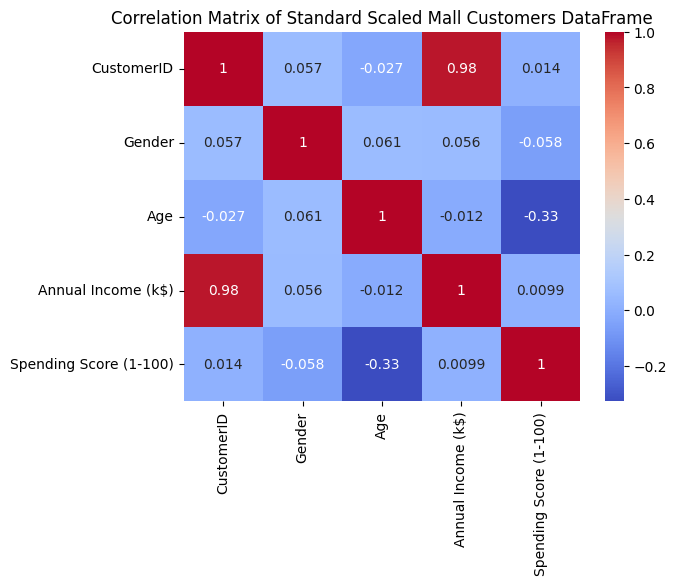

The Correlation Matrix is unaffected by scaling the DataFrame. This is because scaling preserves the linear relationships between the variables.


In [ ]:
#Multivariate Analysis using Correlation Matrix and Seaborn Heatmap
# Calculate correlation matrix
correlation_matrix = df_customers_standard_scaled.corr()

# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Standard Scaled Mall Customers DataFrame')
plt.show()

print("The Correlation Matrix is unaffected by scaling the DataFrame. This is because scaling preserves the linear relationships between the variables.")

In [ ]:
#Outlier Detection and Treatment

# Statistical methods to identify outliers
from scipy.stats import zscore

# Calculate z-score for each feature
z_scores = df_customers.apply(zscore)

# Filter outliers based on z-score threshold (e.g., 3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Show outliers
print(outliers_zscore.any())


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool


In [ ]:
# Detect outliers using IQR method
Q1 = df_customers.quantile(0.25)
Q3 = df_customers.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers based on IQR
outliers_iqr = (df_customers < (Q1 - 1.5 * IQR)) | (df_customers > (Q3 + 1.5 * IQR))

# Show outliers
print(outliers_iqr.any())

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)         True
Spending Score (1-100)    False
dtype: bool


We see that there are outliers for the attribute Annual Income (k$), so we can visualize these outliers.

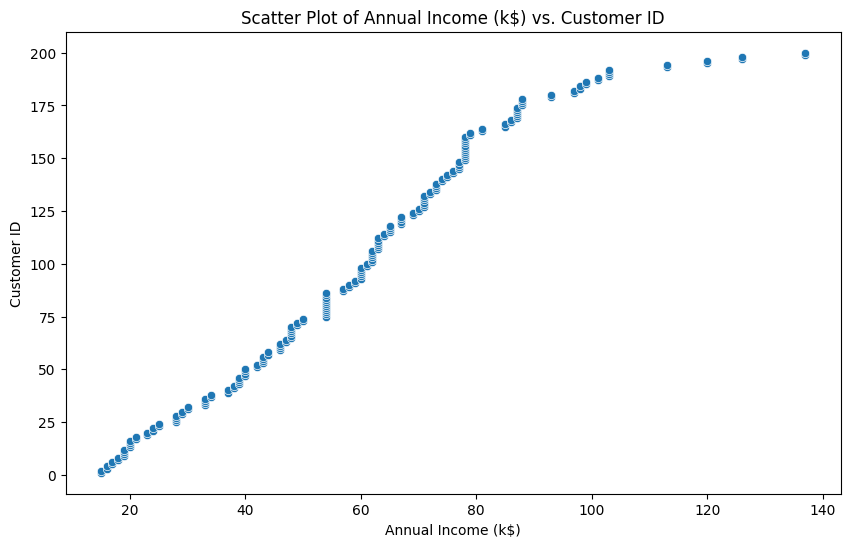

In [ ]:
# Using a Scatter Plot to help us visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='CustomerID', data=df_customers)
plt.title('Scatter Plot of Annual Income (k$) vs. Customer ID')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Customer ID')
plt.show()

We can identify the outliers in Annual Income (k$) and their corresponding Customer ID from the above scatter plot.

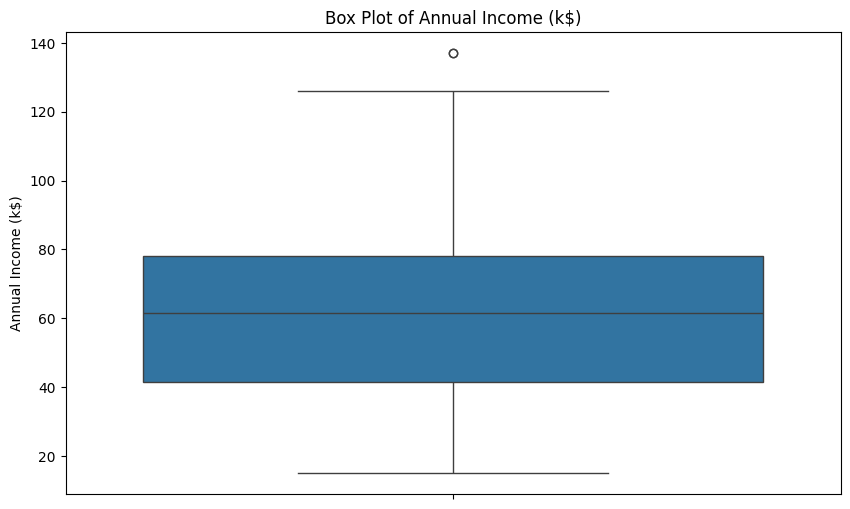

In [ ]:
# Box plot to better visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_customers["Annual Income (k$)"])
plt.title('Box Plot of Annual Income (k$)')
plt.show()

In the above box-plot, we can see that there is one outlier in the column, 'Annual Income' that falls outside the whiskers of the box-plot, between 130 and 140 k$.

#**4. Implementation of Clustering Techniques, along with Performance Evaluation**

In [ ]:
#a. K-Means Clustering

# We want to create clusters of Customers who share similar behaviour. For that, we need to select the columns.
# Columns Selected: Spending Score and Annual Income

# Importing the warnings library so that we can avoid warnings.
import warnings
warnings.filterwarnings('ignore')

# Selecting the Spending Score, and Annual Income Columns from the Data
df_kmeans = df_customers.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# Let's check the shape of the new DataFrame X.
print(df_kmeans.shape)

(200, 2)


In [ ]:
# Let's also check the data, which we are going to use for the clustering analysis
df_kmeans_data  = pd.DataFrame(df_kmeans)
df_kmeans_data.head()
# where 0->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


## Kmeans Clustering Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

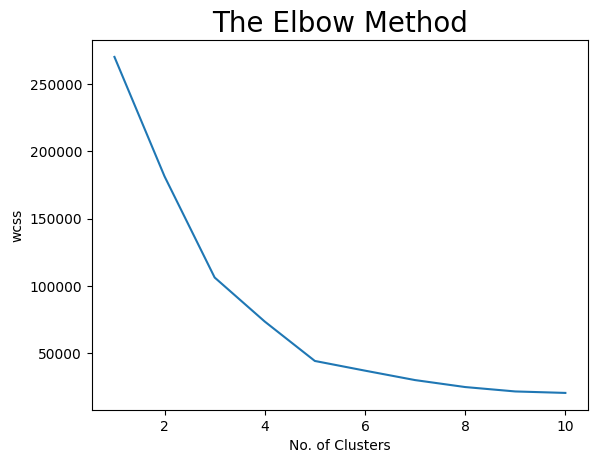

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df_kmeans)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

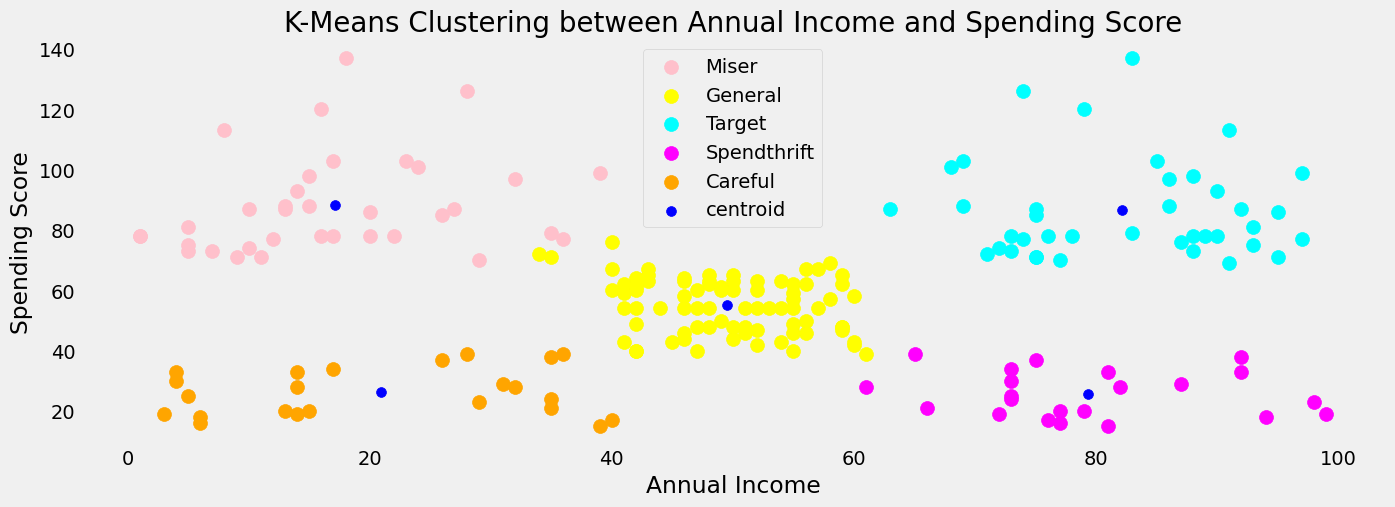

In [ ]:
# Let us visualize these clusters using the KMeans Algortihm.

#From the Elbow Method above, the value of k (No. of clusters) chosen is 5, as 5 is the X-axis point at which the elbow is formed.

plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_means = km.fit_predict(df_kmeans)

plt.scatter(df_kmeans[pred_means == 0, 0], df_kmeans[pred_means == 0, 1], s = 100, c = 'pink', label = 'Miser')
plt.scatter(df_kmeans[pred_means == 1, 0], df_kmeans[pred_means == 1, 1], s = 100, c = 'yellow', label = 'General')
plt.scatter(df_kmeans[pred_means == 2, 0], df_kmeans[pred_means == 2, 1], s = 100, c = 'cyan', label = 'Target')
plt.scatter(df_kmeans[pred_means == 3, 0], df_kmeans[pred_means == 3, 1], s = 100, c = 'magenta', label = 'Spendthrift')
plt.scatter(df_kmeans[pred_means == 4, 0], df_kmeans[pred_means == 4, 1], s = 100, c = 'orange', label = 'Careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.style.use('fivethirtyeight')
plt.title('K-Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Clustering between Age and Spending Score

In [ ]:
# Selecting the Spending Score, and Age Columns from the Data
df_kmeans_age_score = df_customers.loc[:, ['Spending Score (1-100)', 'Age']].values

# Let's check the shape of the new DataFrame X.
print(df_kmeans_age_score.shape,"\n")

# Let's also check the data, which we are going to use for the clustering analysis
df_kmeans_age_score_data  = pd.DataFrame(df_kmeans_age_score)
df_kmeans_age_score_data.head()
# where 0->Spending Score, and 1->Age


(200, 2) 



,0,1
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31


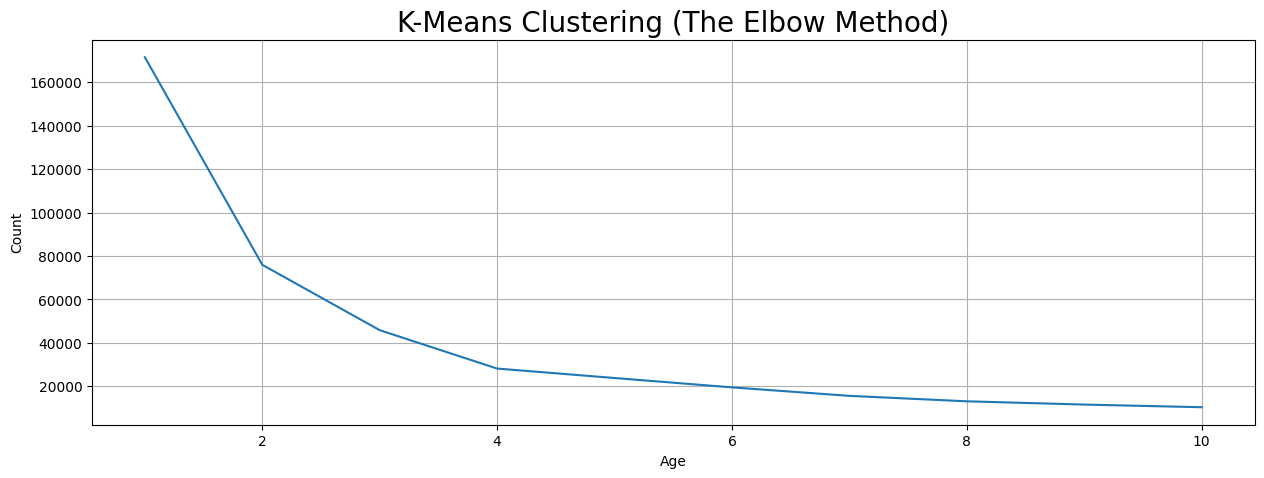

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_kmeans_age_score)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering (The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()


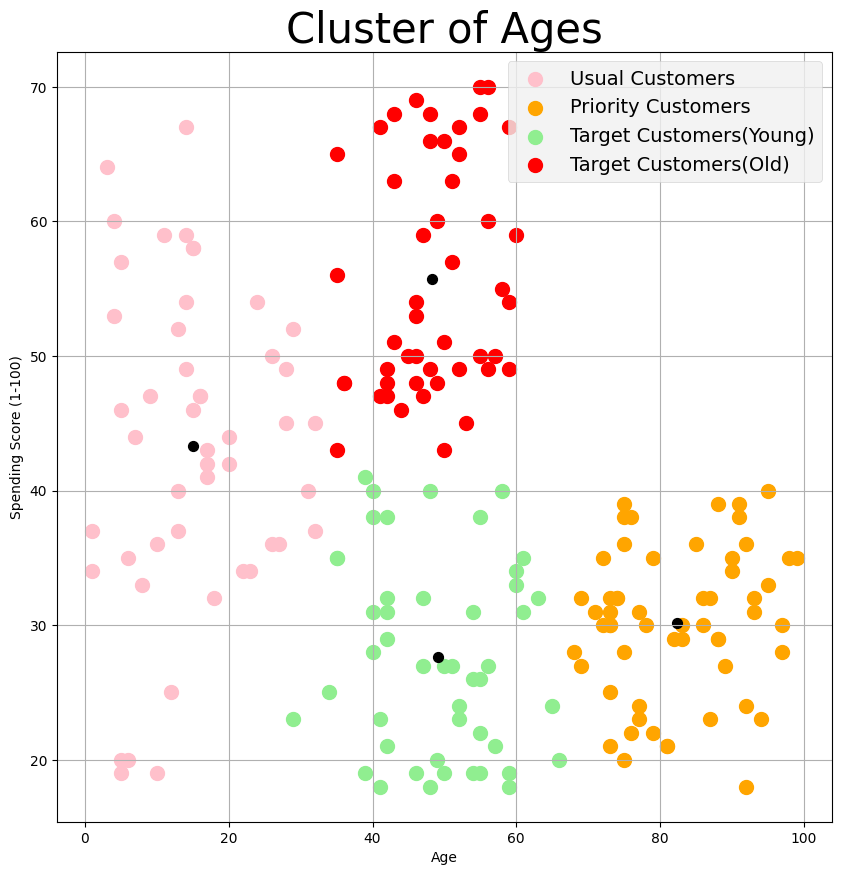

In [ ]:
#From the Elbow Method above, we choose the k-value (Number of Clusters) as 4, as the X-axis value for which an elbow is formed is 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_means_age = kmeans.fit_predict(df_kmeans_age_score)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(df_kmeans_age_score[pred_means_age == 0, 0], df_kmeans_age_score[pred_means_age == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(df_kmeans_age_score[pred_means_age == 1, 0], df_kmeans_age_score[pred_means_age == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(df_kmeans_age_score[pred_means_age == 2, 0], df_kmeans_age_score[pred_means_age == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(df_kmeans_age_score[pred_means_age == 3, 0], df_kmeans_age_score[pred_means_age == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

**Silhouette Score Analysis**

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters=[1,2,3,4,5,6]
n_clusters=5

In [ ]:
#We create a new DataFrame for Silhouette Score calculation by dropping the CustomerID and Gender Columns.
df_silhouette_score=df_customers.iloc[:,2:]
print(df_silhouette_score)


     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [ ]:
#We create a separate DataFrame from the scaled DataFrame.

df_scaled_silhouette_score=df_customers_standard_scaled.iloc[:,2:]
print(df_scaled_silhouette_score)

          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
..        ...                 ...                     ...
195 -0.276302            2.268791                1.118061
196  0.441365            2.497807               -0.861839
197 -0.491602            2.497807                0.923953
198 -0.491602            2.917671               -1.250054
199 -0.635135            2.917671                1.273347

[200 rows x 3 columns]


In [ ]:
print("The Silhouette Score for KMeans Classification (original data) is ",silhouette_score(df_silhouette_score, kmeans.fit_predict(df_silhouette_score)))

The Silhouette Score for KMeans Classification (original data) is  0.40546302077733304


In [ ]:
print("The Silhouette Score for KMeans Classification (after scaling) is ",silhouette_score(df_scaled_silhouette_score, kmeans.fit_predict(df_scaled_silhouette_score)))

The Silhouette Score for KMeans Classification (after scaling) is  0.4039582785148566


**b. Agglomerative Clustering using Dendogram Method**

In [ ]:
#Import the necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


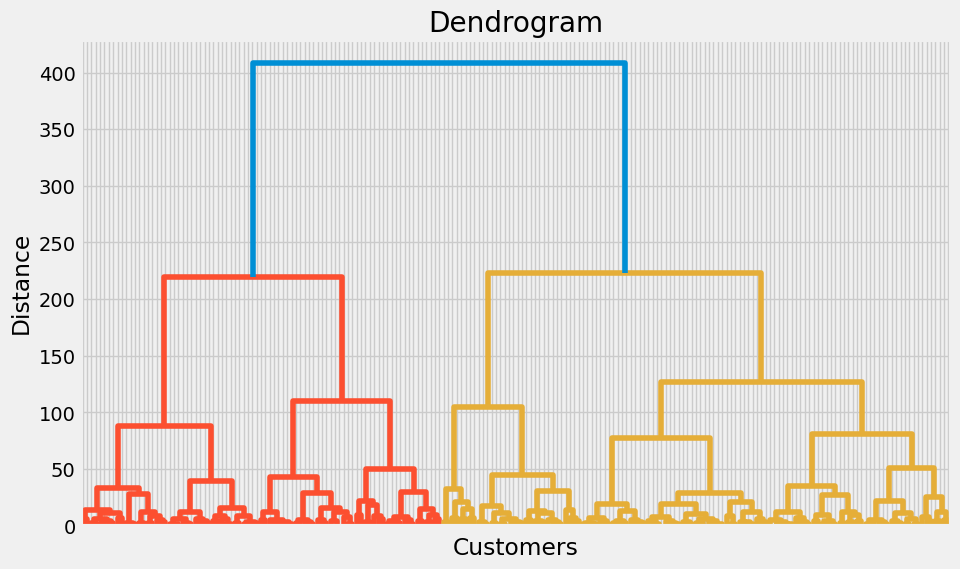

In [ ]:
# Perform Agglomerative Clustering
# Using Ward Linkage (forms perfect clusters) and Euclidean distance
#We drop the columns CustomerID and Gender, as they provide redundant information that may complicate the dendogram.

#First, we perform agglomerative clustering on the original data.
df_agglomerative = df_customers.drop(columns=['CustomerID', 'Gender']) #We create a new DataFrame, df_agglomerative
ward_linkage = linkage(df_agglomerative, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(ward_linkage, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
# Remove X-axis values
plt.gca().set_xticklabels([])
plt.show()

# Based on the dendrogram, we choose the optimal number of clusters

# Fit Agglomerative Clustering
n_clusters = 5  # Example: choosing 5 clusters
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
df_customers['Spending Score (1-100)'] = agg_cluster.fit_predict(df_agglomerative)


In [ ]:
# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(df_agglomerative, df_customers['Spending Score (1-100)'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.36124203412964645


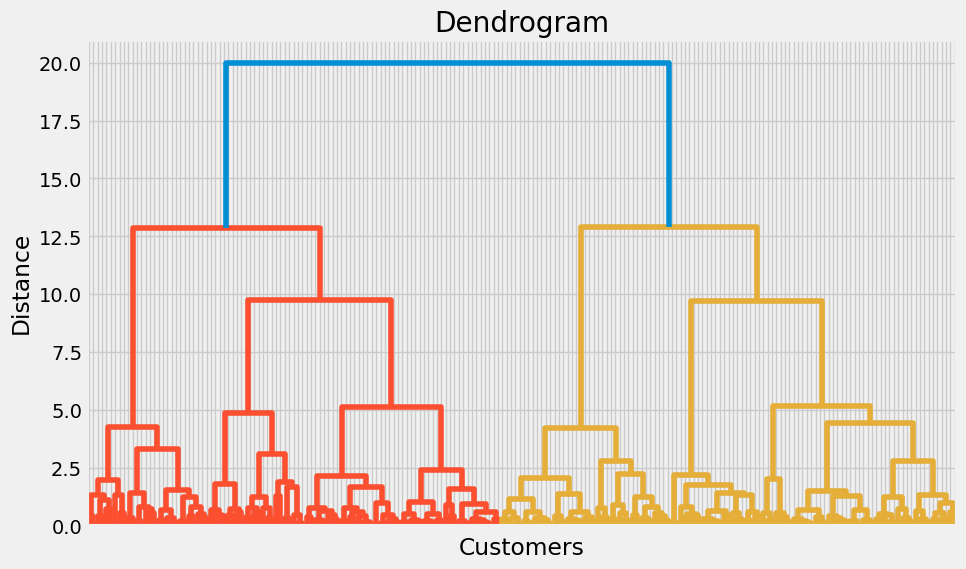

In [ ]:
# Perform Agglomerative Clustering
# Using Ward linkage and Euclidean distance
#We drop the columns CustomerID and Gender, as they provide redundant information that may complicate the dendogram.

df_agglomerative_scaled = df_customers_standard_scaled.drop(columns=['CustomerID', 'Gender']) #We create a new DataFrame, df_agglomerative_scaled
obj_ward_linkage = linkage(df_agglomerative_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(obj_ward_linkage, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
# Remove X-axis values
plt.gca().set_xticklabels([])
plt.show()

# Based on the dendrogram, we choose the optimal number of clusters

# Fit Agglomerative Clustering
n_clusters = 5  # Example: choosing 5 clusters
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_customers['Spending Score (1-100)'] = agg_cluster.fit_predict(df_agglomerative_scaled)


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Cutting the dendrogram to obtain clusters
num_clusters = 5  # Number of clusters
clusters = fcluster(obj_ward_linkage, num_clusters, criterion='maxclust')

# Print the clusters
print("Clusters:", clusters)


Clusters: [2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 5 2 5 3 5 2 5 2 5 3 5 5 5 3 5 5 3 3 3 3 3 5 3 3 5 3 3 3 5 5 3 5 5 3 3 3 3
 3 5 5 5 5 3 3 5 3 3 5 3 3 5 5 3 3 5 3 5 5 5 3 5 3 5 5 3 3 5 3 5 3 3 3 3 3
 5 5 5 5 5 3 3 3 3 5 5 5 4 5 4 3 4 1 4 1 4 5 4 5 4 1 4 5 4 1 4 5 4 5 4 3 4
 1 4 1 4 1 4 1 4 1 4 1 4 3 4 5 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [ ]:
# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(df_agglomerative_scaled, df_customers_standard_scaled['Spending Score (1-100)'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: -0.46131581691246604


#**5. Explanation and Reasoning of the Results Obtained**

**Theory and Formula of Silhouette Score:**

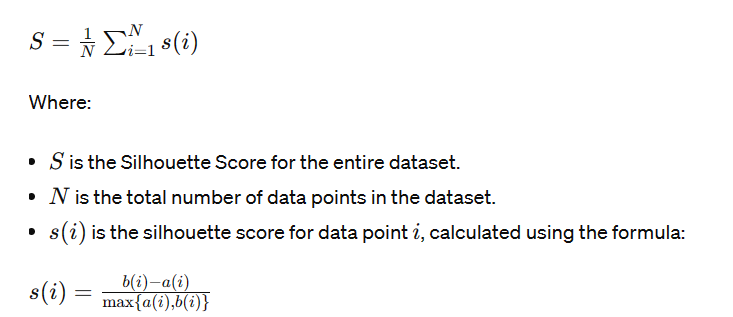

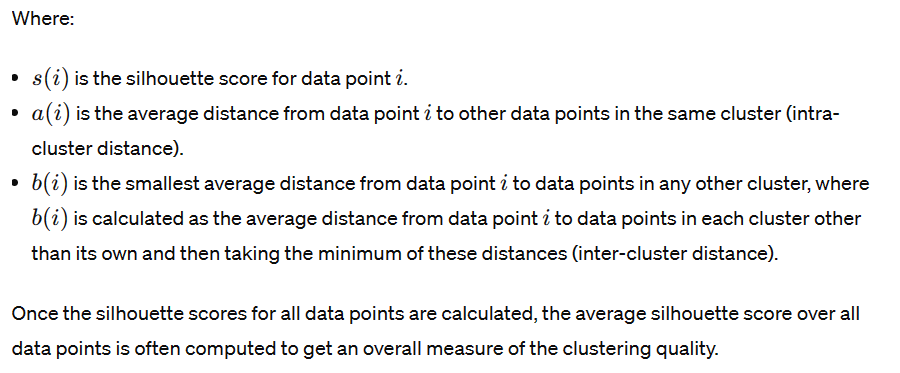

**Results Obtained:**

The Silhouette Score obtained through :

a. KMeans Clustering on unscaled data is 0.405,

b. KMeans Clustering on scaled data is 0.403.

c. Agglomerative Clustering on unscaled data is 0.368.

d. Agglomerative Clustering on scaled data is -0.461.



-> The Silhouette Score is a widely-used metric for evaluating the quality of
clusters obtained from clustering algorithms.

-> It provides a measure of how well-separated the clusters are and helps assess the appropriateness of the clustering algorithm and the number of clusters chosen.

-> The Silhouette Score is intuitive and easy to interpret.

-> It ranges from -1 to 1, where a score closer to 1 indicates dense, well-separated clusters, a score around 0 indicates overlapping clusters, and a score closer to -1 indicates poor clustering.

-> By comparing the Silhouette Scores obtained from different algorithms, one can determine which approach produces the most well-defined clusters for a given dataset.


**Analysis and Reasoning of the Results Obtained:**


**1. KMeans Clustering gave better results (Silhouette Score) than Agglomerative Clustering on the original data as well as the scaled data.**


**2. The reasons for this might be:**

a. K-Means assumes that clusters are spherical and of equal size, while agglomerative clustering does not make such assumptions. Since the clusters in the dataset are roughly spherical and of similar size, as indicated by the scatter plot, KMeans gives a better Silhouette Score than Agglomerative Clustering by Ward Linkage Method.

b.  K-Means works well with clusters of similar density, whereas agglomerative clustering can handle clusters of varying densities. Since the clusters in the dataset have similar densities, as indicated by the scatter-plot, K-Means might produce better results.


**3. Effect of Data Scaling on the Results:**

If the features in the dataset have different scales, scaling the data **might** improve the performance of K-Means and result in a higher Silhouette Score. However, **agglomerative clustering is less affected by scaling. So, Silhouette Score does not improve on scaling for Agglomerative Clustering- instead, it decreases.**